In [364]:
import warnings
warnings.filterwarnings('ignore')

# CQF Exam One - 2021/3/14

## NOTE TO GRADER: 
Sorry had a hard time convert this report to PDF and failed, can only do HTML instead

#### delegate: Lu, Zhenyang,  zzhenyanglu@gmail.com, +1-312-804-2532

## Question 1(a) 

Theoretically, quarterly and monthly Sharpe Ration (SR) would be: 

$SR_{quarterly}＝SR_{annually} * \frac{1}{\sqrt{4}} = \frac{R_a - R_a}{\sigma_a} * \frac{1}{2} = 0.265$ 

$SR_{monthly}＝SR_{annually} * \frac{1}{\sqrt{12}} = 0.153 $ 

## Question 1(b)

Annually, P(P&L < 0) = P(x < - $SR_{annually}$) = P(x < - 0.53) 

Quarterly, P(P&L < 0) = P(x < - $SR_{quarterly}$ ) = P(x < - 0.265)

Monthly, P(P&L < 0) = P(x < - $SR_{monthly}$ ) = P(x < - 0.153)

Now $P(x < - 0.53) < P(x < - 0.265) < P(x < - 0.153)$, as a quick example, taking standard normal distribution (0,1) from python's scipy CDF function: 

P(P&L < 0) = P(x < - $SR_{annually}$) = P(x < - 0.53) = 29.81%

P(P&L < 0) = P(x < - $SR_{quarterly}$ ) = P(x < - 0.265) = 39.55%

P(P&L < 0) = P(x < - $SR_{monthly}$ ) = P(x < - 0.153) = 43.92%

which means probability of an annualized P&L is smaller than 0 is 29.81%, that of quarterly and monthly are 39.55% and 43.92%, and that illustrates $“Evaluating the P&L more frequently, means its appears more risky than it actually is.”$

#### python code calculates CDFs of standard normal distribution for Question 1(b): 

In [1]:
from scipy.stats import norm
print("P(x<-0.53) = {:.2%}".format(norm.cdf(-0.53)))
print("P(x<-0.265) = {:.2%}".format(norm.cdf(-0.265)))
print("P(x<-0.153) = {:.2%}".format(norm.cdf(-0.153)))

P(x<-0.53) = 29.81%
P(x<-0.265) = 39.55%
P(x<-0.153) = 43.92%


## Question 2 (a)

Assuming there is no budget constraint (to be clear, my understanding of it is $1^T\omega$ does not have to be necessarily equal to 1. Lagrangian function with respect to $\omega$ and $\lambda$: 
      $$L(\omega, \lambda) = \frac{1}{2}\omega^T\Sigma\omega + \lambda[m - \gamma -(\mu-\gamma\textbf{1})^T\omega]$$
      
and solve for the first order condition:

$$ \frac{\delta{L}}{\delta{\omega}} = \omega^T\Sigma - \lambda(\mu-\gamma\textbf{1})^T=0$$
$$ \frac{\delta{L}}{\delta{\lambda}} = m - \gamma -(\mu-\gamma\textbf{1})^T\omega=0$$

since $ \frac{\delta^2{L}}{\delta{\omega}^2} =\Sigma $,which is positive, we have reached the optimal weight vector:  
 
$$ \lambda = \frac{(m-\gamma)}{(\mu-\gamma\textbf{1})^T\Sigma^{-1}(\mu-\gamma\textbf{1})}           (i) $$

$$ \omega = \lambda(\mu-\gamma\textbf{1})\Sigma^{-1}               (ii)$$ 


that’s essentially as far as we can go without putting some values into the correlation matrix 

## Question 2 (b)

The following function is based on formula (ii) and returns get optimal($\omega$), target portfolio return (based on result of $\omega^T*\mu$, not mirrowing input $\mu$ sort of like a validation) and portfolio std deviation: 

In [68]:
import numpy as np 

# define a portfolio optimize function based on analytical result 
def analytical_portfolio_optimize(mu, sigma, corr, m, r) -> tuple:    
    # one vector
    ones = np.ones((mu.shape[0],1))
    # covariance matrix
    covar = sigma.T.dot(corr).dot(sigma)
    covar_inverse = np.linalg.inv(covar) 
    r_vector = r*ones
    # formula (i) from previous cell
    _lambda = (m-r)/((mu - r_vector).T.dot(covar_inverse).dot(mu - r_vector))
    omega = _lambda*(mu-r_vector).T.dot(covar_inverse)

    # return value is (portfolio weights, portfolio calculated return, portfolio std deviation)
    return omega, (r + omega.dot(mu-r_vector))[0][0], (omega.dot(covar).dot(omega.T))[0][0]**0.5

###  define parameters and run target return value(m) = 5%
$ \textbf{portfolio weights} $ are:  0.11306403, 0.30116639, -0.23623674, 0.20893623

$ \textbf{portfolio_sigma} $: 0.03774847334530612

$ \textbf{portfolio_target_return}$ should be equal to  $ r + (\mu − \gamma\textbf{1})\omega$, which is 0.05

In [66]:
# asset expected returns 
mu = np.array([[.04],[.08],[.12],[.15]])
# asset std deviation
sigma = np.diag([.07,.12,.18,.26])
# correlation matrix 
corr = np.array([[1.0,.2,.5,.3],[.2,1.0,.7,.4],[.5,.7,1.0,.9],[.3,.4,.9,1.0]])
# risk free rate 
r = 0.03
# RUN m = 5%
weights, portfolio_target_return, portfolio_sigma = analytical_portfolio_optimize(mu=mu, sigma=sigma, corr=corr, m=0.05, r=r)
print(f"portfolio weights: {weights}")
print(f"portfolio risk(std deviation): {portfolio_sigma}")
print(f"calculated portfolio return: {portfolio_target_return}")

portfolio weights: [[ 0.11306403  0.30116639 -0.23623674  0.20893623]]
portfolio risk(std deviation): 0.03774847334530612
calculated portfolio return: 0.05


###  when m = 7.5 %, 10%, 12.5%: 

In [65]:
for m in [0.075, 0.1,0.125]:
    weights, portfolio_target_return, portfolio_sigma = \
        analytical_portfolio_optimize(mu=mu, sigma=sigma, corr=corr, m=m, r=r)
    print(f"portfolio target return: {m}")
    print(f"portfolio weights: {weights}")
    print(f"portfolio risk(std deviation): {portfolio_sigma}")
    print(f"calculated portfolio return: {portfolio_target_return}\n")

portfolio target return: 0.075
portfolio weights: [[ 0.25439408  0.67762437 -0.53153267  0.47010651]]
portfolio risk(std deviation): 0.08493406502693876
calculated portfolio return: 0.07499999999999998

portfolio target return: 0.1
portfolio weights: [[ 0.39572412  1.05408235 -0.82682859  0.73127679]]
portfolio risk(std deviation): 0.13211965670857143
calculated portfolio return: 0.1

portfolio target return: 0.125
portfolio weights: [[ 0.53705416  1.43054033 -1.12212452  0.99244707]]
portfolio risk(std deviation): 0.17930524839020404
calculated portfolio return: 0.125



### Plotting a Efficient Frontier

based on the constraint: $\gamma -(\mu-\gamma\textbf{1})^T\omega = m$, and the fact that there is not budget constraints, this portfolio contains risky assets and risk free asset, so its shape should be a straight line, whose slope is the sharpe ratio. 

In [148]:
from matplotlib.pyplot import plot, style

m_min = 0.03
m_max = 0.9
n = 1000
# asset expected returns 
mu = np.array([[.04],[.08],[.12],[.15]])
# asset std deviation
sigma = np.diag([.07,.12,.18,.26])
# correlation matrix 
corr = np.array([[1.0,.2,.5,.3],[.2,1.0,.7,.4],[.5,.7,1.0,.9],[.3,.4,.9,1.0]])

#to contain returns and sigmas from analytical portfolio 
portfolio_returns, portfolio_sigmas = [], []

# m is expected return ranging from 
for m in range(int(m_min*n), int(m_max*n), 1):
    m = m/n
    _, _return, _sigma = analytical_portfolio_optimize(mu=mu, sigma=sigma, corr=corr, m=m, r=r)
    portfolio_returns.append(_return)
    portfolio_sigmas.append(_sigma) 

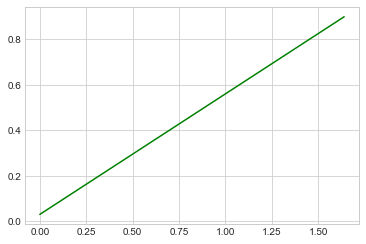

In [149]:
style.use('seaborn-whitegrid')
plot(portfolio_sigmas, portfolio_returns, color='green', linestyle='solid')

## Question 3

## VaR sensitivities: 

$ \frac{\delta VaR(\omega)}{\delta\omega_i} = \mu_i + Factor * \frac{(\Sigma\omega)_i}{\sqrt{\omega^T\Sigma\omega}}$

$ \frac{\delta ES(\omega)}{\delta\omega_i} = \mu_i - \frac{\phi(Factor)}{1-c} * \frac{(\Sigma\omega)_i}{\sqrt{\omega^T\Sigma\omega}}$

In [183]:
# portfolio asset, std deviation and weights 
sigma = np.diag([.3,.2,.15])
corr = np.array([[1.0,.8,.5],[.8,1.0,.3],[.5,.3,1.0]])
omega = np.array([[0.5], [0.2], [0.3]])
mu = np.array([[.0],[.0],[.0]])
# confidence 
c = 0.99

define inverse of normal distribution CDF and PDF as following:  

In [186]:
from scipy.stats import norm
# factor(), pdf() takes argument such as 0.01, 0.05, 0.1
# factor() return a Z score and pdf() return a PDF 
factor = lambda x: norm.ppf(1-x)
pdf = lambda x: norm.pdf(x)

given correlation and variance matrix we could calculate covariance matrix: 

$ \Sigma =\sigma^T \cdot Corr \cdot \sigma $

In [187]:
covar = sigma.T.dot(corr).dot(sigma)
print(f"Covariance matrix is\n {covar}")

Covariance matrix is
 [[0.09   0.048  0.0225]
 [0.048  0.04   0.009 ]
 [0.0225 0.009  0.0225]]


define portfolio std deviation (stddev) as $\sqrt{\omega^T\Sigma\omega}$ , which can be calculated as: 

In [188]:
stddev = (omega.T.dot(covar).dot(omega))**0.5
print(f"portfolio standard deviation is \n {stddev[0][0]}")

portfolio standard deviation is 
 0.20869834690289238


So $\textbf{VaR sensitivities wrt each asset} , \frac{\delta VaR(\omega)}{\delta\omega_i} = \mu_i + Factor * \frac{(\Sigma\omega)_i}{\sqrt{\omega^T\Sigma\omega}}$ can be calculated as following: 

In [194]:
mu + (factor(c)/stddev) * covar.dot(omega)

array([[-0.68386475],
       [-0.38679881],
       [-0.2207094 ]])

So $\textbf{ES sensitivities wrt each asset} , \frac{\delta ES(\omega)}{\delta\omega_i} = \mu_i - \frac{\phi(Factor)}{1-c} * \frac{(\Sigma\omega)_i}{\sqrt{\omega^T\Sigma\omega}}$ can be calculated as following: 

In [195]:
mu - (pdf(factor(c))/((1-c)*stddev)) * covar.dot(omega)

array([[-0.78347958],
       [-0.44314167],
       [-0.25285893]])

## Question ４(a)

### Notice: For Question 4, terms in bold are columns in the analysis dataset to help better understand it 

#### Before we start, we need to define some global variable and functions to help us analye, read in raw data and calculate daily log return 

$ \textbf{Daily Log Return} = Log(\frac{{Closing Price}_t}{{Closing Price}_{t-1}}) $

In [468]:
import pandas as pd
import numpy as np
from scipy.stats import norm

#########################################################################################
# HANDY FUNCTIONS 
# factor() takes argument such as 0.99, 0.95, 0.90 and return a Z-score
factor = lambda x: norm.ppf(x)
# square_root() returns square_root
square_root = lambda x: np.sqrt(x)
# calculate daily return 
log_return = lambda x: np.log(x[-1]/x[0])

##########b###############################################################################

#########################################################################################
# GLOBAL INPUTS
HISTORICAL_VAR_ROLLING_DAYS = 21
FORWARD_VAR_ROLLING_DAYS = 10 
DAILY_RETURN_ROLLING_DAYS = 2 # daily return 
VAR_QUANTILE = 0.99 
FACTOR = factor(VAR_QUANTILE)
#########################################################################################

# reading XLSX file, assuming the ftse 100 excel is in the same folder as this notebook
data_21d = pd.read_excel("./Data_FTSE100- January 2021.xlsx", skiprows=1)
data_21d = data_21d.set_index('Date')
data_21d['Daily Log Return'] = data_21d['Closing Price'].rolling(window=DAILY_RETURN_ROLLING_DAYS).apply(log_return)

### 21 historical day rolling standard deviation and forward 10 Day 99th VaR based on  21 historical day rolling daily standard deviation

$ \textbf{21D Daily Deviation} = \frac{\sum{({Daily Return}_i - \mu)}}{N-1}$, where N = 21

$ \textbf{10 Day VaR} = {Factor} * {\Sigma}_t * \sqrt{10} $ 

In [469]:
# 21 DAY DAILY Deviation and VaR
data_21d[f'{HISTORICAL_VAR_ROLLING_DAYS}D Daily Deviation'] = data_21d['Daily Log Return'].rolling(window=HISTORICAL_VAR_ROLLING_DAYS).std()
data_21d[f"{FORWARD_VAR_ROLLING_DAYS} Day VaR"] = data_21d[f'{HISTORICAL_VAR_ROLLING_DAYS}D Daily Deviation']*-Factor*square_root(FORWARD_VAR_ROLLING_DAYS)

### Calculate Breaches and Consecutive Breaches

we calculate 10 day log return by $ \textbf{10 Day Log Return} = Log(\frac{{Closing Price}_t}{{Closing Price}_{t-10}}) $ 

we shift existing 10 VaR column 10 days (10 rows) later by Python Pandas shift function to get comparable 10 VaR and 10 Day Log Return to same row for calculation (called $ \textbf{Shifted 10 VaR} $ below). 

$ \textbf{Breach} $ is a bool column that indicates if there is a breach or not 

$ \textbf{Rolling Consecutive Breaches} $ column indicates number of consecutive breaches, which is calculated by  $\textit{get_consecutive_breaches() }$ 

and finally $ \textbf{Total Consecutive Breaches} $ is based on $\textbf{Rolling Consecutive Breaches} $ and only takes the largest number of a row from $\textbf{Rolling Consecutive Breaches} $  for example a row of rolling consecutive breaches like 1,2,3,4 would mean total consecutive breaches is 4 

In [470]:
# function get consecutive breaches 
def get_rolling_consecutive_breaches(breach: list) ->list: 
    consecutive_breaches = []

    for i in range(len(breach)): 
        if breach[i] == False:
            consecutive_breaches.append(0)
        elif breach[i] == True:
            consecutive_breaches.append( breach[i-1] +consecutive_breaches[-1])
    return consecutive_breaches

# function get consecutive breaches based on rolling_consecutive_breaches
def get_total_consecutive_breaches(rolling_consecutive_breaches: list) ->list: 
    total = 0 
    for i in range(len(rolling_consecutive_breaches[:-1])):
        if rolling_consecutive_breaches[i+1] == 0: 
            total = total + rolling_consecutive_breaches[i] 
    return total

log_return = lambda x: np.log(x[-1]/x[0])
data_21d[f'{FORWARD_VAR_ROLLING_DAYS}D Log Return'] = data_21d['Closing Price'].rolling(window=FORWARD_VAR_ROLLING_DAYS+1).apply(log_return)
data_21d[f'Shifted {FORWARD_VAR_ROLLING_DAYS} Day VaR'] = data_21d[f"{FORWARD_VAR_ROLLING_DAYS} Day VaR"].shift(FORWARD_VAR_ROLLING_DAYS)
data_21d[f'{FORWARD_VAR_ROLLING_DAYS}D Breach'] = data_21d[f'{FORWARD_VAR_ROLLING_DAYS}D Log Return'] < data_21d[f'Shifted {FORWARD_VAR_ROLLING_DAYS} Day VaR']
data_21d[f'{FORWARD_VAR_ROLLING_DAYS}D Rolling Consecutive Breaches'] = get_rolling_consecutive_breaches(data_21d[f'{FORWARD_VAR_ROLLING_DAYS}D Breach'].tolist())

## 21D: sample data of breach days

In [471]:
data_21d[ data_21d[f'{FORWARD_VAR_ROLLING_DAYS}D Breach'] ].head(10)

,Closing Price,Daily Log Return,21D Daily Deviation,10 Day VaR,10D Log Return,Shifted 10 Day VaR,10D Breach,10D Rolling Consecutive Breaches
Date,,,,,,,,
2010-01-28,5145.74,-0.013843,0.008309,-0.061123,-0.066252,-0.062370,True,0
2010-05-04,5411.11,-0.025936,0.011191,-0.082329,-0.056896,-0.046298,True,0
2010-05-05,5341.93,-0.012867,0.010954,-0.080584,-0.079455,-0.048439,True,1
2010-05-06,5260.99,-0.015268,0.011011,-0.081003,-0.084249,-0.051919,True,2
2010-05-07,5123.02,-0.026575,0.012011,-0.088357,-0.100621,-0.054720,True,3
2010-05-10,5387.42,0.050322,0.017085,-0.125685,-0.060540,-0.056555,True,4
2010-05-11,5334.21,-0.009926,0.016885,-0.124215,-0.075728,-0.057088,True,5
2010-07-05,4823.53,-0.003014,0.011506,-0.084645,-0.094033,-0.089368,True,0
2011-03-16,5598.23,-0.017187,0.008614,-0.063368,-0.055022,-0.051109,True,0


#### 21D: average of 21D Daily Deviation:

In [472]:
data_21d[f'{HISTORICAL_VAR_ROLLING_DAYS}D Daily Deviation'].mean()

0.010266728665813643

##  21D: Percentage of VaR breaches

In [473]:
number_of_breaches = data_21d[data_21d[f'{FORWARD_VAR_ROLLING_DAYS}D Breach']].shape[0]
number_of_days = data_21d[~data_21d[f'Shifted {FORWARD_VAR_ROLLING_DAYS} Day VaR'].isnull() ].shape[0]
breach_percentage_21 = number_of_breaches/number_of_days
print(f"Number of Breaches:{'{0:.4%}'.format(breach_percentage_21)}")

Number of Breaches:2.2495%


## 21D : Number of  Consecutive Breaches days

In [474]:
rolling_consecutive_breaches = data_21d[f'{FORWARD_VAR_ROLLING_DAYS}D Rolling Consecutive Breaches'].tolist()
consecutive_breaches_21 = get_total_consecutive_breaches(rolling_consecutive_breaches)
print(f'Number of Consecutive Breaches: {consecutive_breaches_21} times')

Number of Consecutive Breaches: 14 times


### 21D: Plots 

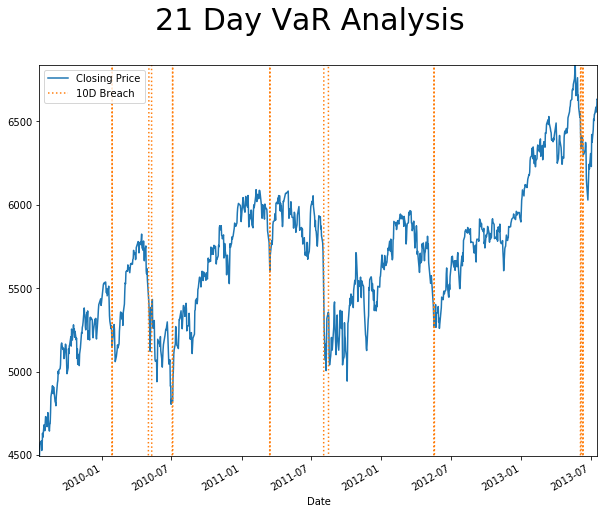

In [459]:
import matplotlib.pyplot as plt

max_price = data_21d['Closing Price'].max()
min_price = data_21d['Closing Price'].min()
fig, ax = plt.subplots()
fig.suptitle("21 Day VaR Analysis", fontsize=30)
graph_size = (10,8)

data_21d['Closing Price'].plot(figsize=graph_size, ylim = (min_price, max_price) ,legend=True)
VaR_plot_21 = (data_21d[f'{FORWARD_VAR_ROLLING_DAYS}D Breach'].astype(int) *(max_price)).plot(linestyle='dotted', figsize=graph_size,legend=True)

## Question 4(b)

Without repeating articulating much of details, the following code, which repeats the above code used for 21 Day VaR analysis, calculates 99%/10day VaR with 42 historical day horizon by first defining HISTORICAL_VAR_ROLLING_DAYS as 42 

In [520]:
#########################################################################################
# GLOBAL INPUTS
HISTORICAL_VAR_ROLLING_DAYS = 42
FORWARD_VAR_ROLLING_DAYS = 10 
DAILY_RETURN_ROLLING_DAYS = 2 # daily return 
VAR_QUANTILE = 0.99 
FACTOR = factor(VAR_QUANTILE)
#########################################################################################

# reading XLSX file, assuming the ftse 100 excel is in the same folder as this notebook
data_42d = pd.read_excel("./Data_FTSE100- January 2021.xlsx", skiprows=1)
data_42d = data_42d.set_index('Date')
data_42d['Daily Log Return'] = data_42d['Closing Price'].rolling(window=DAILY_RETURN_ROLLING_DAYS).apply(log_return)

data_42d[f'{HISTORICAL_VAR_ROLLING_DAYS}D Daily Deviation'] = data_42d['Daily Log Return'].rolling(window=HISTORICAL_VAR_ROLLING_DAYS).std()
data_42d[f"{FORWARD_VAR_ROLLING_DAYS} Day VaR"] = data_42d[f'{HISTORICAL_VAR_ROLLING_DAYS}D Daily Deviation']*-Factor*square_root(FORWARD_VAR_ROLLING_DAYS)
data_42d[f'{FORWARD_VAR_ROLLING_DAYS}D Log Return'] = data_42d['Closing Price'].rolling(window=FORWARD_VAR_ROLLING_DAYS+1).apply(log_return)
data_42d[f'Shifted {FORWARD_VAR_ROLLING_DAYS} Day VaR'] = data_42d[f"{FORWARD_VAR_ROLLING_DAYS} Day VaR"].shift(FORWARD_VAR_ROLLING_DAYS)
data_42d[f'{FORWARD_VAR_ROLLING_DAYS}D Breach'] = data_42d[f'{FORWARD_VAR_ROLLING_DAYS}D Log Return'] < data_42d[f'Shifted {FORWARD_VAR_ROLLING_DAYS} Day VaR']
data_42d[f'{FORWARD_VAR_ROLLING_DAYS}D Rolling Consecutive Breaches'] = get_rolling_consecutive_breaches(data_42d[f'{FORWARD_VAR_ROLLING_DAYS}D Breach'].tolist())

#### Sample data

In [521]:
data_42d[data_42d[f'{FORWARD_VAR_ROLLING_DAYS}D Breach']].head(5)

,Closing Price,Daily Log Return,42D Daily Deviation,10 Day VaR,10D Log Return,Shifted 10 Day VaR,10D Breach,10D Rolling Consecutive Breaches
Date,,,,,,,,
2010-05-04,5411.11,-0.025936,0.008804,-0.064766,-0.056896,-0.050046,True,0
2010-05-05,5341.93,-0.012867,0.008888,-0.065382,-0.079455,-0.050578,True,1
2010-05-06,5260.99,-0.015268,0.009162,-0.067404,-0.084249,-0.051901,True,2
2010-05-07,5123.02,-0.026575,0.009687,-0.071263,-0.100621,-0.053352,True,3
2010-05-10,5387.42,0.050322,0.012619,-0.092832,-0.060540,-0.054214,True,4


#### 42D: Average of 42D Daily Deviation:

In [522]:
data_42d[f'{HISTORICAL_VAR_ROLLING_DAYS}D Daily Deviation'].mean()

0.010372089369491314

##  42D: Percentage of VaR breaches

In [523]:
number_of_breaches = data_42d[data_42d[f'{FORWARD_VAR_ROLLING_DAYS}D Breach']].shape[0]
number_of_days = data_42d[~data_42d[f'Shifted {FORWARD_VAR_ROLLING_DAYS} Day VaR'].isnull() ].shape[0]
breach_percentage_42 = number_of_breaches/number_of_days
print(f"Number of Breaches:{'{0:.4%}'.format(breach_percentage_42)}")

Number of Breaches:2.1944%


## 42D : Number of  Consecutive Breaches days

In [524]:
rolling_consecutive_breaches = data_42d[f'{FORWARD_VAR_ROLLING_DAYS}D Rolling Consecutive Breaches'].tolist()
consecutive_breaches_42 = get_total_consecutive_breaches(rolling_consecutive_breaches)
print(f'Number of Consecutive Breaches: {consecutive_breaches_42} times')

Number of Consecutive Breaches: 15 times


### Plots - 21D and 42D altogether 

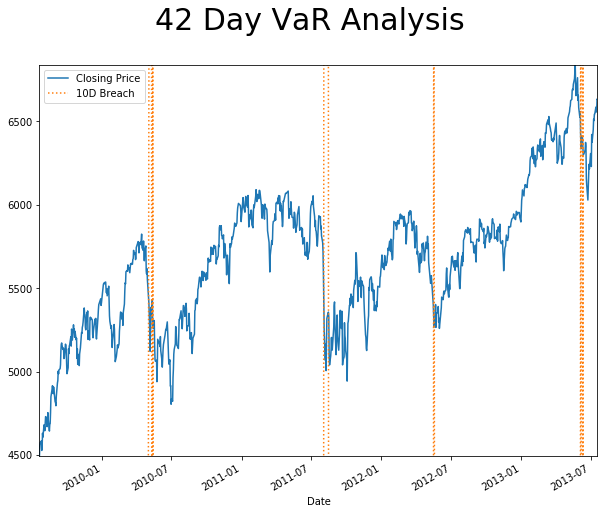

In [525]:
import matplotlib.pyplot as plt

max_price = data_42d['Closing Price'].max()
min_price = data_42d['Closing Price'].min()
fig, ax = plt.subplots()
fig.suptitle("42 Day VaR Analysis", fontsize=30)
graph_size = (10,8)

data_42d['Closing Price'].plot(figsize=graph_size, ylim = (min_price, max_price) ,legend=True)
(data_42d[f'{FORWARD_VAR_ROLLING_DAYS}D Breach'].astype(int) *(max_price)).plot(
    linestyle='dotted', figsize=graph_size,legend=True)

## Question 4 - Summary Table & Summary plots

In [533]:
pd.DataFrame([[breach_percentage_21, consecutive_breaches_21],[breach_percentage_42, consecutive_breaches_42]], 
             columns = ['VaR Breach %', 'Consecutive Breaches'], index = ['21 Day', '42 Day'])

,VaR Breach %,Consecutive Breaches
21 Day,0.022495,14
42 Day,0.021944,15


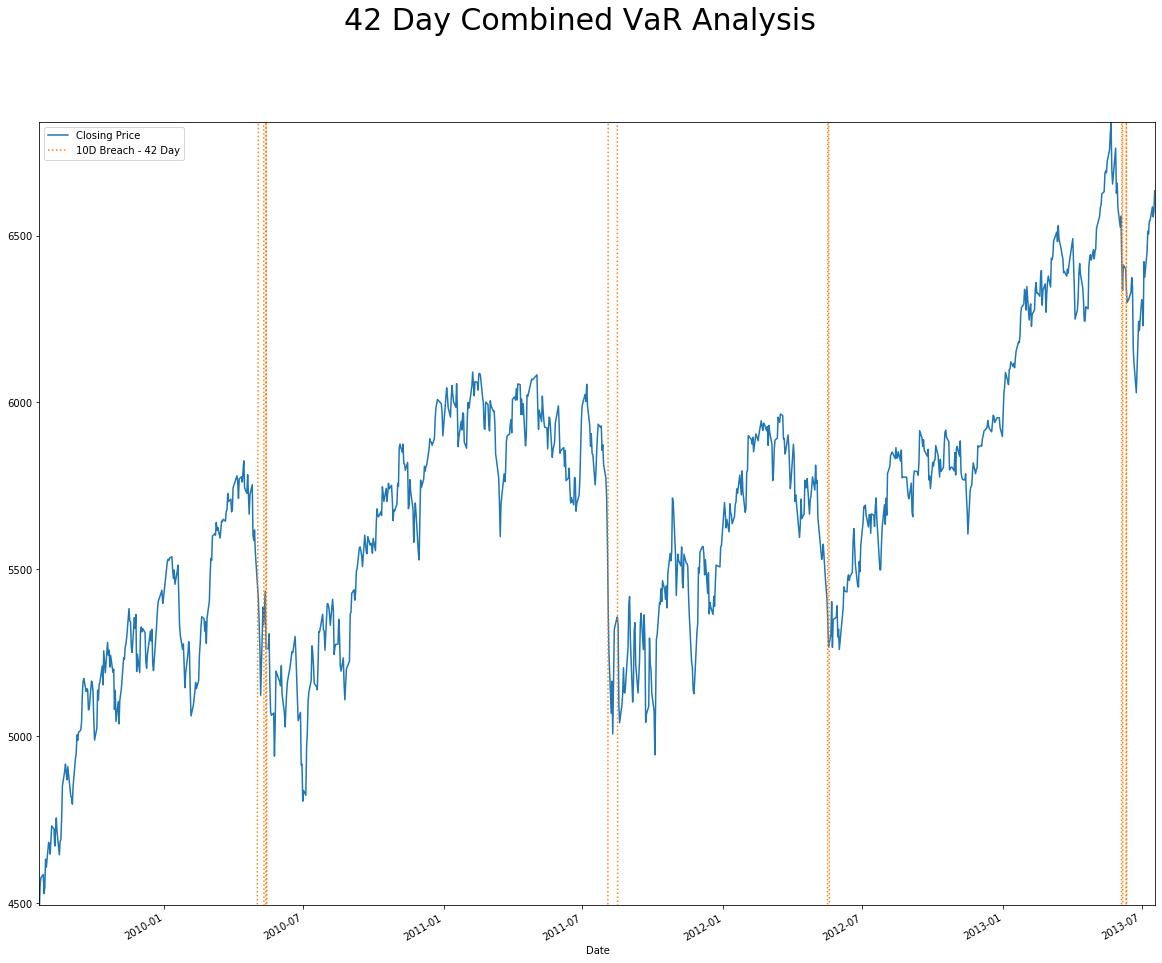

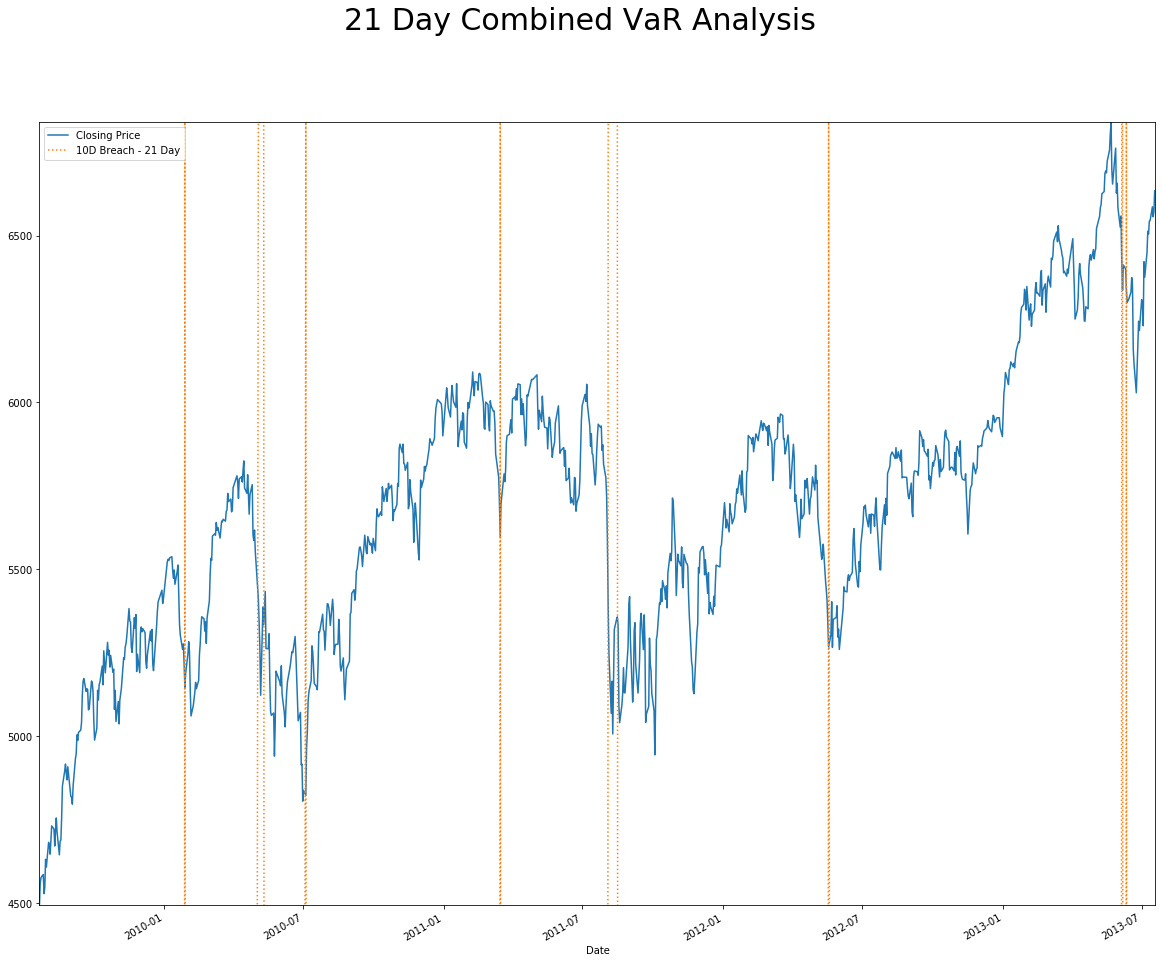

In [536]:
import matplotlib.pyplot as plt

max_price = data_42d['Closing Price'].max()
min_price = data_42d['Closing Price'].min()
             
fig, ax = plt.subplots()
fig.suptitle("42 Day Combined VaR Analysis", fontsize=30)
graph_size = (20,16)

data_42d = data_42d.rename({'10D Breach': '10D Breach - 42 Day'},axis=1)
data_42d['Closing Price'].plot(figsize=graph_size, ylim = (min_price, max_price) ,legend=True)
(data_42d[f'{FORWARD_VAR_ROLLING_DAYS}D Breach - 42 Day'].astype(int) *(max_price)).plot(
    linestyle='dotted', figsize=graph_size,legend=True)

fig, ax = plt.subplots()
fig.suptitle("21 Day Combined VaR Analysis", fontsize=30)
data_21d['Closing Price'].plot(figsize=graph_size, ylim = (min_price, max_price) ,legend=True)
data_21d = data_21d.rename({'10D Breach': '10D Breach - 21 Day'},axis=1)
(data_21d[f'{FORWARD_VAR_ROLLING_DAYS}D Breach - 21 Day'].astype(int) *(max_price)).plot(
    linestyle='dotted', figsize=graph_size,legend=True)

In [530]:
data_42d

,Closing Price,Daily Log Return,42D Daily Deviation,10 Day VaR,10D Log Return,Shifted 10 Day VaR,10D Breach - 42 Day,10D Rolling Consecutive Breaches
Date,,,,,,,,
2009-07-22,4493.73,NaN,NaN,NaN,NaN,NaN,False,0
2009-07-23,4559.80,0.014596,NaN,NaN,NaN,NaN,False,0
2009-07-24,4576.61,0.003680,NaN,NaN,NaN,NaN,False,0
2009-07-27,4586.13,0.002078,NaN,NaN,NaN,NaN,False,0
2009-07-28,4528.84,-0.012571,NaN,NaN,NaN,NaN,False,0
...,...,...,...,...,...,...,...,...
2013-07-15,6586.11,0.006271,0.011838,-0.087089,0.043179,-0.077647,False,0
2013-07-16,6556.35,-0.004529,0.011855,-0.087215,0.039259,-0.077525,False,0
2013-07-17,6571.93,0.002374,0.011830,-0.087026,0.053452,-0.078530,False,0


## Question 5
### (a)

#### Section 32.5
Backtesting of the bank-wide risk model must be based on a VaR measure calibrated at a $ \textbf{99th percentile}$ confidence level.

(1)	
An exception or an outlier occurs when either the actual loss or the hypothetical loss of the bank-wide trading book registered in a day of the backtesting period exceeds the corresponding daily VaR measure given by the model. As per MAR99.8, exceptions for actual losses are counted separately from exceptions for hypothetical losses; the overall number of exceptions is the greater of these two amounts.

(2)	
In the event either the P&L or the daily VaR measure is not available or impossible to compute, it will count as an outlier


### (b)
#### Section 32.19

If any given trading desk experiences either more than 12 exceptions at the 99th percentile or $ \textbf{30 exceptions at the 97.5th percentile} $ in the most recent 12-month period, the capital requirement for all of the positions in the trading desk must be determined using the standardised approach.1

### (c)

#### Section 32.34
The PLA requirements are based on two test metrics:

(1)	
$ \textbf{the Spearman correlation metric} $ to assess the correlation between RTPL and HPL; and

(2)	
$ \textbf{the Kolmogorov-Smirnov (KS) test metric}$ to assess similarity of the distributions of RTPL and HPL.